# Decision Tree Lab

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from sklearn.metrics import accuracy_score
! pip install sweetviz
import sweetviz as sv
from sklearn.impute import SimpleImputer

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [ ]:
#Debug
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
encoder = OneHotEncoder()
iris_hot_targets = encoder.fit_transform(iris.target.reshape(-1, 1)).toarray()
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris_hot_targets, test_size=.2)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [ ]:
# Evaluation
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
encoder = OneHotEncoder()
iris_hot_targets = encoder.fit_transform(iris.target.reshape(-1, 1)).toarray()
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris_hot_targets, test_size=.2)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


Discussion

I got a lower score when I limited the depth of my tree to 3. I believe this means that it needs more than 3 layers to find the proper splits

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [ ]:
# Learn Voting with missing values.
dataset = "voting_with_missing.arff.txt"
data, meta = arff.loadarff(dataset)
data = np.array(data)
dataset_df = pd.DataFrame(data)
for column in dataset_df.columns:
    dataset_df[column] = dataset_df[column].str.decode('utf-8')

for values in dataset_df.values:
    for i in range(len(values)):
        if values[i] == "?":
            values[i] = "U"

target_class = "Class"
target_array = dataset_df[[target_class]]
X = dataset_df.drop(target_class, axis=1)

encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()
y = encoder.fit_transform(target_array).toarray()

voting_clf = DecisionTreeClassifier()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

test_accuracy = accuracy_score(y_test,y_pred)
train_accuracy = voting_clf.score(X_train,y_train)

print(f'Test Accuracy: {test_accuracy}')
print(f'Train Accuracy: {train_accuracy}')


Test Accuracy: 0.9310344827586207
Train Accuracy: 1.0


Discussion including explaining how the missing values were handled by your model

So my little code looks each column in my Data Frame and then converts to a normal string value. Then it finds everywhere a value is ? and turns it into a U. Then I separated my targets (Class) from the rest of my data and OneHotEncoded each of the different sets of data and ran my data.

It work pretty good based on my trainging and test scores.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [ ]:
cars_data,meta = arff.loadarff('cars.arff.txt')
cars_df = pd.DataFrame(cars_data)

for column in cars_df.columns:
    cars_df[column] = cars_df[column].str.decode('utf-8')

In [ ]:
from sklearn.model_selection import cross_val_score

def train_a_tree(dataframe, folds):
    test_average = 0
    train_average = 0

    target_class = "class"
    target_array = dataframe[target_class]
    X = dataframe.drop(target_class, axis=1)

    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    y_encoded = target_array.values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=.2)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    cv_scores = cross_val_score(clf, X_encoded, y_encoded, cv=folds)

    print("Cross-validation scores:")
    for i, score in enumerate(cv_scores, 1):
        print(f"Fold {i}: {score}")

    print(f"\nAverage accuracy: {cv_scores.mean()}")


train_a_tree(cars_df, 10)

Cross-validation scores:
Fold 1: 0.7572254335260116
Fold 2: 0.7514450867052023
Fold 3: 0.9075144508670521
Fold 4: 0.6763005780346821
Fold 5: 0.838150289017341
Fold 6: 0.9248554913294798
Fold 7: 0.884393063583815
Fold 8: 0.8728323699421965
Fold 9: 0.9127906976744186
Fold 10: 0.8488372093023255

Average accuracy: 0.8374344669982525


In [ ]:
train_a_tree(cars_df, 5)

Cross-validation scores:
Fold 1: 0.7312138728323699
Fold 2: 0.7138728323699421
Fold 3: 0.7456647398843931
Fold 4: 0.7536231884057971
Fold 5: 0.8057971014492754

Average accuracy: 0.7500343469883555


Discussion

So I ran both of them and I found that for this particular dataset, that 10 folds was better than 5.


### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

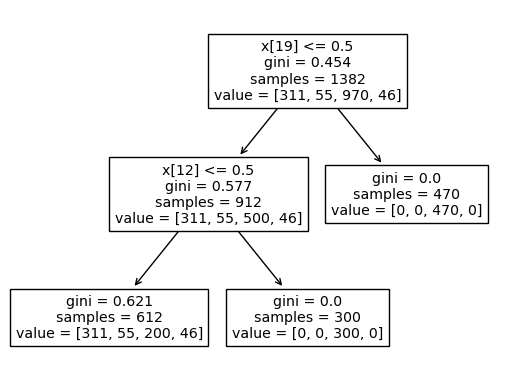

In [ ]:
#Print induced trees for the voting and car data sets
from sklearn.tree import plot_tree

def print_tree_cars(dataframe):
  target_class = "class"
  target_array = dataframe[target_class]
  X = dataframe.drop(target_class, axis=1)

  # One-hot encode categorical features
  encoder = OneHotEncoder()
  X_encoded = encoder.fit_transform(X).toarray()
  y_encoded = target_array.values.reshape(-1, 1)

  # Split the data once outside the loop
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=.2)

  clf = DecisionTreeClassifier(max_depth=2)
  clf.fit(X_train, y_train)

  plot_tree(clf)


print_tree_cars(cars_df)

[Text(0.390625, 0.95, 'x[11] <= 0.5\ngini = 0.469\nsamples = 348\nvalue = [[131, 217]\n[217, 131]]'),
 Text(0.20833333333333334, 0.85, 'x[8] <= 0.5\ngini = 0.038\nsamples = 209\nvalue = [[4, 205]\n[205, 4]]'),
 Text(0.16666666666666666, 0.75, 'x[33] <= 0.5\ngini = 0.269\nsamples = 25\nvalue = [[4, 21]\n[21, 4]]'),
 Text(0.08333333333333333, 0.65, 'x[31] <= 0.5\ngini = 0.165\nsamples = 22\nvalue = [[2, 20]\n[20, 2]]'),
 Text(0.041666666666666664, 0.55, 'gini = 0.0\nsamples = 14\nvalue = [[0, 14]\n[14, 0]]'),
 Text(0.125, 0.55, 'x[43] <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [[2, 6]\n[6, 2]]'),
 Text(0.08333333333333333, 0.45, 'gini = 0.0\nsamples = 5\nvalue = [[0, 5]\n[5, 0]]'),
 Text(0.16666666666666666, 0.45, 'x[14] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[2, 1]\n[1, 2]]'),
 Text(0.125, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[0, 2]]'),
 Text(0.20833333333333334, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(0.25, 0.65, 'x[0] <= 0.5\ngini = 0.444\nsa

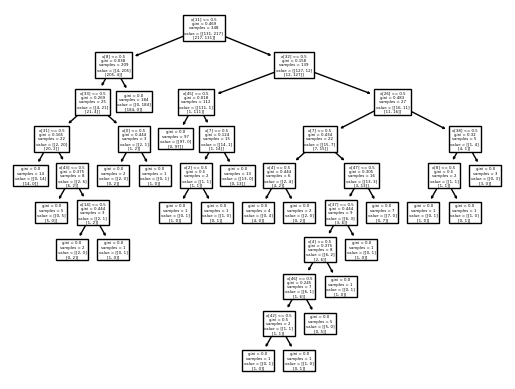

In [ ]:
plot_tree(voting_clf)

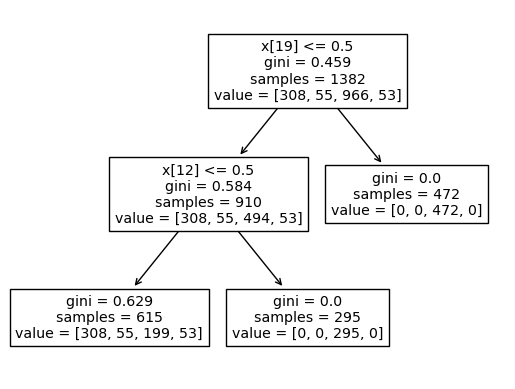

In [ ]:
print_tree_cars(cars_df)

[Text(0.5, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.48\nsamples = 348\nvalue = [[139, 209]\n[209, 139]]'),
 Text(0.25, 0.5, 'x[8] <= 0.5\ngini = 0.039\nsamples = 201\nvalue = [[4, 197]\n[197, 4]]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.287\nsamples = 23\nvalue = [[4, 19]\n[19, 4]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 178\nvalue = [[0, 178]\n[178, 0]]'),
 Text(0.75, 0.5, 'x[32] <= 0.5\ngini = 0.15\nsamples = 147\nvalue = [[135, 12]\n[12, 135]]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.048\nsamples = 122\nvalue = [[119, 3]\n[3, 119]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.461\nsamples = 25\nvalue = [[16, 9]\n[9, 16]]')]

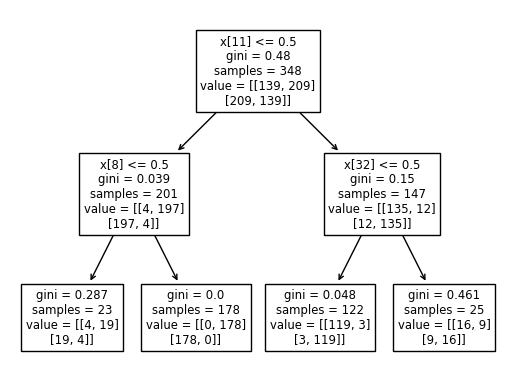

In [ ]:
voting_clf = DecisionTreeClassifier(max_depth=2)

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

voting_clf.fit(X_train, y_train)

plot_tree(voting_clf)

Discuss what the Trees have learned on the 2 data sets

Well one thing that i noticed that was interesting was that for the cars dataset, it was able to determine a class pretty quickly based only on one parameter while the voting has two main branches splitting from the root of the tree

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

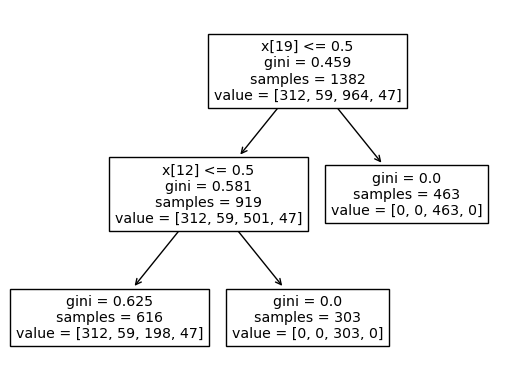

In [ ]:
# Experiment with criterion parameter

def print_tree_cars_criterion(dataframe, crit='gini'):
  target_class = "class"
  target_array = dataframe[target_class]
  X = dataframe.drop(target_class, axis=1)

  # One-hot encode categorical features
  encoder = OneHotEncoder()
  X_encoded = encoder.fit_transform(X).toarray()
  y_encoded = target_array.values.reshape(-1, 1)

  # Split the data once outside the loop
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=.2)

  clf = DecisionTreeClassifier(max_depth=2, criterion=crit)
  clf.fit(X_train, y_train)

  plot_tree(clf)


print_tree_cars_criterion(cars_df)

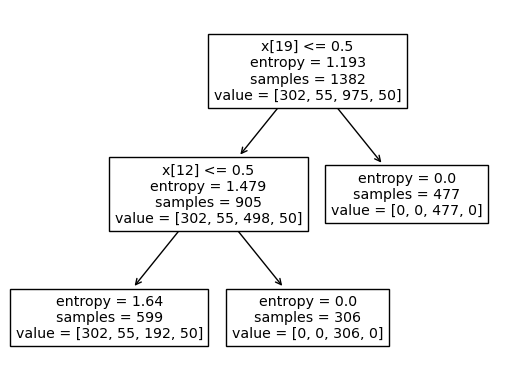

In [ ]:
print_tree_cars_criterion(cars_df,crit='entropy')

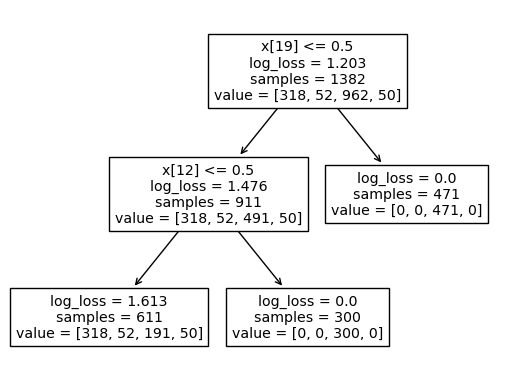

In [ ]:
print_tree_cars_criterion(cars_df,crit='log_loss')

Discuss criterion effects

So I found that for the cars dataset, they all performed fairly similarly in how they structed the tree. They all had the right side only having one branch off of the root. The differences came in what values were placed in that right branch and how many samples for each value were there.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [ ]:
# Explore different overfit parameters
def print_tree_cars_overfitting(dataframe, min_samples_leaf=None, min_samples_split=2, min_impurity_decrease=0.0, max_depth=None, max_leaf_node=None, max_features=None,ccp_alpha=0.0, runs=1):
  target_class = "class"
  target_array = dataframe[target_class]
  X = dataframe.drop(target_class, axis=1)

  # One-hot encode categorical features
  encoder = OneHotEncoder()
  X_encoded = encoder.fit_transform(X).toarray()
  y_encoded = target_array.values.reshape(-1, 1)

  for i in range(runs):
    # Split the data once outside the loop
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=.2)

    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_split, min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, max_depth=max_depth,
                                max_leaf_nodes=max_leaf_node, max_features=max_features, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    test_accuracy = accuracy_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)



    print(f'Test Accuracy ({ccp_alpha}): {test_accuracy}')
    print(f'Train Accuracy({ccp_alpha}): {train_accuracy}')
    print(f'Total number of nodes({ccp_alpha}): {clf.tree_.node_count}')
    print(f'Maximum tree depth({ccp_alpha}): {clf.tree_.max_depth}\n')
    ccp_alpha=ccp_alpha*(1/10)

print_tree_cars_overfitting(cars_df, min_samples_leaf=2)

Test Accuracy (0.0): 0.9566473988439307
Train Accuracy(0.0): 0.9869753979739508
Total number of nodes(0.0): 159
Maximum tree depth(0.0): 13



In [ ]:
print_tree_cars_overfitting(cars_df, min_samples_split=10)

Test Accuracy (0.0): 0.9132947976878613
Train Accuracy(0.0): 0.9479015918958031
Total number of nodes(0.0): 73
Maximum tree depth(0.0): 10



Discussion

The

In [ ]:
print_tree_cars_overfitting(cars_df, min_impurity_decrease=2.9)

Test Accuracy (0.0): 0.7225433526011561
Train Accuracy(0.0): 0.6946454413892909
Total number of nodes(0.0): 1
Maximum tree depth(0.0): 0



In [ ]:
print_tree_cars_overfitting(cars_df, min_impurity_decrease=.9)

Test Accuracy (0.0): 0.684971098265896
Train Accuracy(0.0): 0.7040520984081042
Total number of nodes(0.0): 1
Maximum tree depth(0.0): 0



In [ ]:
print_tree_cars_overfitting(cars_df, min_impurity_decrease=.09)

Test Accuracy (0.0): 0.7601156069364162
Train Accuracy(0.0): 0.6852387843704776
Total number of nodes(0.0): 1
Maximum tree depth(0.0): 0



In [ ]:
print_tree_cars_overfitting(cars_df, min_impurity_decrease=.009)

Test Accuracy (0.0): 0.8901734104046243
Train Accuracy(0.0): 0.8726483357452967
Total number of nodes(0.0): 19
Maximum tree depth(0.0): 6



In [ ]:
print_tree_cars_overfitting(cars_df, max_depth = 8)

Test Accuracy (0.0): 0.9421965317919075
Train Accuracy(0.0): 0.9573082489146165
Total number of nodes(0.0): 71
Maximum tree depth(0.0): 8



In [ ]:
print_tree_cars_overfitting(cars_df, max_depth = 7)

Test Accuracy (0.0): 0.9161849710982659
Train Accuracy(0.0): 0.9240231548480463
Total number of nodes(0.0): 55
Maximum tree depth(0.0): 7



In [ ]:
print_tree_cars_overfitting(cars_df, max_depth = 6)

Test Accuracy (0.0): 0.8901734104046243
Train Accuracy(0.0): 0.8965267727930536
Total number of nodes(0.0): 33
Maximum tree depth(0.0): 6



In [ ]:
print_tree_cars_overfitting(cars_df, max_leaf_node=10)

Test Accuracy (0.0): 0.8757225433526011
Train Accuracy(0.0): 0.8733719247467439
Total number of nodes(0.0): 19
Maximum tree depth(0.0): 6



In [ ]:
print_tree_cars_overfitting(cars_df, max_features = 2)

Test Accuracy (0.0): 0.7369942196531792
Train Accuracy(0.0): 0.9095513748191028
Total number of nodes(0.0): 547
Maximum tree depth(0.0): 14



In [ ]:
print_tree_cars_overfitting(cars_df, max_features= 4)

Test Accuracy (0.0): 0.884393063583815
Train Accuracy(0.0): 0.9522431259044862
Total number of nodes(0.0): 331
Maximum tree depth(0.0): 14



In [ ]:
print_tree_cars_overfitting(cars_df, max_features= 8)

Test Accuracy (0.0): 0.9248554913294798
Train Accuracy(0.0): 0.9782923299565847
Total number of nodes(0.0): 253
Maximum tree depth(0.0): 13



In [ ]:
print_tree_cars_overfitting(cars_df, max_features= 16)

Test Accuracy (0.0): 0.953757225433526
Train Accuracy(0.0): 0.9884225759768451
Total number of nodes(0.0): 169
Maximum tree depth(0.0): 12



In [ ]:
print_tree_cars_overfitting(cars_df, max_features= 32)

Test Accuracy (0.0): 0.9797687861271677
Train Accuracy(0.0): 0.9898697539797395
Total number of nodes(0.0): 161
Maximum tree depth(0.0): 12



### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [ ]:
# Pruning
print_tree_cars_overfitting(cars_df, ccp_alpha=5, runs=5)

Test Accuracy (5): 0.7109826589595376
Train Accuracy(5): 0.6975397973950795
Total number of nodes(5): 1
Maximum tree depth(5): 0

Test Accuracy (0.5): 0.6560693641618497
Train Accuracy(0.5): 0.711287988422576
Total number of nodes(0.5): 1
Maximum tree depth(0.5): 0

Test Accuracy (0.05): 0.7861271676300579
Train Accuracy(0.05): 0.7756874095513748
Total number of nodes(0.05): 5
Maximum tree depth(0.05): 2

Test Accuracy (0.005000000000000001): 0.9075144508670521
Train Accuracy(0.005000000000000001): 0.9319826338639653
Total number of nodes(0.005000000000000001): 37
Maximum tree depth(0.005000000000000001): 8

Test Accuracy (0.0005000000000000001): 0.9624277456647399
Train Accuracy(0.0005000000000000001): 0.9884225759768451
Total number of nodes(0.0005000000000000001): 119
Maximum tree depth(0.0005000000000000001): 12



Discussion

I see that usually with a lower ccp_alpha value we get a better test and train accuracy. I also noticed the higher the ccp_alpha, then the lower amount of nodes and a lower max depth.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def regression_tree(data):
  dataframe = pd.read_csv(data)
  dataframe = dataframe.fillna("NA")
  drop_column = ['Generation', 'Name', 'Type 1', "Type 2", 'Legendary']
  dataframe = dataframe.drop(drop_column, axis=1)

  target_class = ['Combat Power']

  target = dataframe[target_class]
  X = dataframe.drop(target_class, axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=.2)

  clf = DecisionTreeRegressor()
  clf.fit(X_train, y_train)

  y_test_pred = clf.predict(X_test)
  y_train_pred = clf.predict(X_train)

  test_mae = mean_absolute_error(y_test, y_test_pred)
  train_mae = mean_absolute_error(y_train, y_train_pred)

  test_score = clf.score(X_test, y_test)
  train_score = clf.score(X_train, y_train)


  print(f'MAE on Test Set: {test_mae}')
  print(f'MAE on Training Set: {train_mae}')
  print(f'Test Accuracy: {test_accuracy}')
  print(f'Train Accuracy: {train_accuracy}')
  print(f'Total number of nodes: {clf.tree_.node_count}')
  print(f'Maximum tree depth: {clf.tree_.max_depth}\n')

regression_tree('pokemon.csv')

MAE on Test Set: 39.806451612903224
MAE on Training Set: 0.0
Test Accuracy: 0.9310344827586207
Train Accuracy: 1.0
Total number of nodes: 211
Maximum tree depth: 12



Discussion

So I got a 0 on my traing MAE, but a 52.9 on the test. So a pretty big swing from what was reality.

My test and train accuracies were pretty close.

I had a lot more nodes and a lot deeper tree than I was expecting.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        return 0

In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])